In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from adjustText import adjust_text

from PIL import Image
from pdb import set_trace as st 
import random
import json
import os 
from tqdm import tqdm
import string
from src.Aux import * 
from src.Triangles import Triangle
from src.Illustrate import * 
from src.text_in_bbox import *

In [2]:
emnist_loc = "/home/yfrid/Desktop/stem-whiteboard/dataset/mnist/EMNIST/raw/"
emnist_images = read_idx_ubyte(emnist_loc+"emnist-byclass-train-images-idx3-ubyte")
emnist_labels = read_idx_ubyte(emnist_loc+"emnist-byclass-train-labels-idx1-ubyte")
emnist_chars = string.digits+string.ascii_uppercase+string.ascii_lowercase
EMNIST = EMNIST_Handler(emnist_images,emnist_labels,emnist_chars)

Reading image data: 697932 images of 28x28 pixels.
Reading label data: 697932 labels.


In [3]:
lower_letters = string.ascii_lowercase
#greek_letters = ['α', 'β', 'γ', 'δ', 'θ']

def plot_geometry_improved(description):
    fig, ax = plt.subplots(figsize=(8,6),dpi = 64)
    
    labels = []
    handwritten = True#bool(random.getrandbits(1))
    # Set up the plot with some padding
    all_x = [v["x"] for v in description["vertices"]]
    all_y = [v["y"] for v in description["vertices"]]
    x_range = max(all_x) - min(all_x)
    y_range = max(all_y) - min(all_y)
    padding = max(x_range, y_range) * 0.1
    
    ax.set_xlim(min(all_x) - padding, max(all_x) + padding)
    ax.set_ylim(min(all_y) - padding, max(all_y) + padding)
    

####################################################### SEGMENTS
    description["index_lookup"] = {d["mark"]: i for i, d in enumerate(description["vertices"])} ## add index to each vertice for easier search
    description,segment_labels = plot_segments(description,ax,EMNIST,handwritten)
################################################### SPECIALS
    description = plot_specials(description,ax,EMNIST,handwritten)

################################################### ANGLES
    description, angle_labels = plot_angles(description,ax,EMNIST,handwritten)

    
#################################################### VERTICES    
    labels = plot_vertices(description,ax,EMNIST,handwritten)

    for v in description["vertices"]:
        v["x"] = np.around((v["x"]-min(all_x))/(max(all_x)-min(all_x)),2)
        v["y"] = np.around((v["y"]-min(all_y))/(max(all_y)-min(all_y)),2)
        

#################################################### QUESTION



    
    # Combine all labels for adjustment
    all_labels = labels + segment_labels + angle_labels
    
    # Get all non-text artists (points, lines) to avoid
    avoid_objects = [artist for artist in ax.get_children() 
                    if not isinstance(artist, plt.Text)]
    
    # Fine-tune the label positioning
    adjust_text(all_labels, ax=ax,
                add_objects=avoid_objects,
                expand_points=(1.5, 1.5),    # Distance from points
                expand_text=(1.2, 1.2),     # Distance between labels
                expand_objects=(1.2, 1.2),  # Distance from lines/objects
                arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5, lw=0.5),
                force_points=(0.5, 0.5),    # Force to avoid points
                force_text=(0.5, 0.5),      # Force to avoid text overlap
                force_objects=(0.3, 0.3),   # Force to avoid other objects
                lim=1000)                   # Maximum iterations
    
    ax.set_aspect('equal')
    ax.axis('off')
#    ax.set_title('Geometry Problem', 
 #fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()




    
#    plot_text_in_bbox(ax,text, [xs[0],ys[0],xs[1],ys[1]])
    plt.axis('off')#    plt.text(np.mean(xs),np.mean(ys),text)
    return description


def convert_numpy_types(obj):
    if isinstance(obj, np.bool_):
        return bool(obj)
    elif isinstance(obj, (np.int_, np.intc, np.intp, np.int8, np.int16, np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.float_, np.float16, np.float32, np.float64)):
        return float(obj)
    elif isinstance(obj, dict):
        return {k: convert_numpy_types(v) for k, v in obj.items()}
    elif isinstance(obj, (list, tuple)):
        return [convert_numpy_types(v) for v in obj]
    else:
        return obj



{'vertices': [{'mark': 'A', 'x': 0.23, 'y': 1.0},
  {'mark': 'B', 'x': 0.0, 'y': 0.0},
  {'mark': 'C', 'x': 1.0, 'y': 0.19},
  {'mark': 'D', 'x': 0.61, 'y': 0.59},
  {'mark': 'E', 'x': 0.5, 'y': 0.09},
  {'mark': 'F', 'x': 0.12, 'y': 0.54}],
 'segments': [{'mark': 'AB', 'known': True, 'length': 'g', 'unit': ['cm']},
  {'mark': 'AC', 'known': True, 'length': 10.0, 'unit': ['cm']},
  {'mark': 'BC', 'known': False},
  {'mark': 'AD', 'known': False},
  {'mark': 'DE', 'known': True, 'length': 3.0, 'unit': ['cm']},
  {'mark': 'AE', 'known': False},
  {'mark': 'BE', 'known': False},
  {'mark': 'CE', 'known': False},
  {'mark': 'BF', 'known': False},
  {'mark': 'CF', 'known': True, 'length': 'f', 'unit': ['cm']},
  {'mark': 'AF', 'known': True, 'length': 2.77, 'unit': ['cm']}],
 'angles': [{'mark': 'ABC', 'known': False},
  {'mark': 'BCA', 'known': False},
  {'mark': 'CAB', 'known': True, 'value': 90.0, 'unit': 'deg'},
  {'mark': 'ADE', 'known': True, 'value': 90.0, 'unit': 'deg'},
  {'mark': 

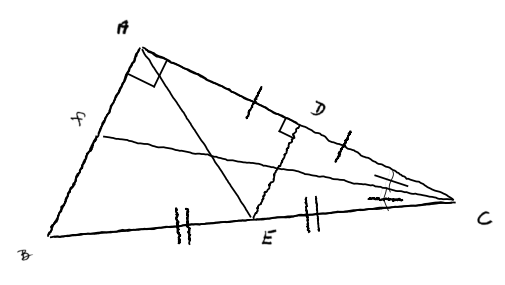

In [24]:
tri = Triangle(6,10,rotation=np.random.randint(360))
tri.third_vertice("right")
A = tri.description["vertices"][0]["mark"]
B = tri.description["vertices"][1]["mark"]
C = tri.description["vertices"][2]["mark"]

#tri.add_median(A,B+C)
tri.add_perpendicular(A+C,B)
#tri.add_perpendicular(B+C,A)
tri.add_median(A,B+C)
tri.add_bisector(B+C+A)
#tri.add_bisector(C+A+B)
#tri.add_altitude(A,B+C)
tri.set_question()
tri.description["angles"][2]["known"] = True
tri.rotate()
plot_geometry_improved(tri.description)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0.0, 505.0, 285.0, 0.0)

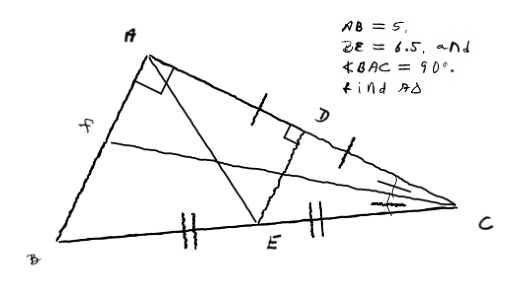

In [25]:

plt.axis('off')
#plt.show()

In [6]:
img_text.shape

(98, 117, 3)

<Figure size 640x480 with 0 Axes>

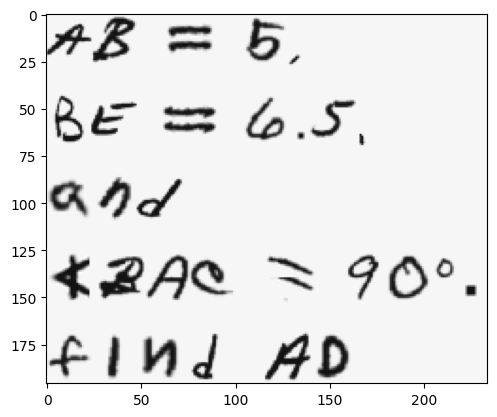

<Figure size 640x480 with 0 Axes>

In [7]:
height = 28

x = 0#xs[0]
y = 0
max_width = 0
token_mats = []
for token in tokens:
    mat = EMNIST.token_mat(token)
    token_mats.append(mat)
    max_width = max(max_width,mat.shape[1])


ratio = max_width//(xs[1]-xs[0])+1

bbox_width = (xs[1]-xs[0])*ratio
bbox = np.ones([height,bbox_width])


for mat in token_mats:
    width = mat.shape[1]
    
    if x+width >= bbox.shape[1]:
        bbox = np.concatenate([bbox,np.ones([height*3//2,bbox_width])],axis = 0)
        x = 0#xs[0]
        y+= height*3//2
    bbox[y:y+height,x:x+width] = mat
    x+= mat.shape[1]+20
#    print(mat.shape)
#bbox = 
plt.imshow(bbox,cmap = 'gray')
from scipy.ndimage import rotate,zoom
plt.figure()
#plt.imshow(zoom(bbox,(1/ratio,1/ratio)),cmap = 'gray')

In [8]:
image = EMNIST.vertical_l()
plt.imshow(image)

AttributeError: 'EMNIST_Handler' object has no attribute 'vertical_l'

In [ ]:
plt.imshow(image)

mat = 1-image
line = np.zeros([28,28])
line[:,12:16] = 1
alphas = np.arange(-90,90,1)
y = alphas*0
def convolve(image,image2,alpha):
    return ((1-image)*rotate(image2, angle=alpha, reshape=False, mode='constant', cval=0)).sum()
for i,alpha in enumerate(alphas):
    y[i] = convolve(mat,line,alpha)    # Rotate the original image to align it vertically

aligned_image = rotate(mat, angle=-alphas[y.argmin()], reshape=False, mode='constant', cval=0)
plt.figure()
plt.plot(alphas,y)
print(alphas[y.argmax()])
plt.figure()
plt.imshow(1-aligned_image.T)